In [1]:
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Data Preprocessing

In [2]:
# load the data to the pandas dataframe 
heart_data = pd.read_csv('heart_disease (1).csv')

In [3]:
#first 3 rows
heart_data

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [4]:
# how many rows and column we have in data set 
heart_data.shape

(303, 14)

In [5]:
# getting some info about null value 
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              303 non-null    float64
 1   gender           303 non-null    float64
 2   cp               303 non-null    float64
 3   trestbps         303 non-null    float64
 4   chol             303 non-null    float64
 5   fbs              303 non-null    float64
 6   restecg          303 non-null    float64
 7   thalach          303 non-null    float64
 8   exang            303 non-null    float64
 9   oldpeak          303 non-null    float64
 10  slope            303 non-null    float64
 11  ca               299 non-null    float64
 12  thal             301 non-null    float64
 13  heart_diagnosis  303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [6]:
#checking for missing vales 
heart_data.isnull().sum()

age                0
gender             0
cp                 0
trestbps           0
chol               0
fbs                0
restecg            0
thalach            0
exang              0
oldpeak            0
slope              0
ca                 4
thal               2
heart_diagnosis    0
dtype: int64

In [7]:
# replacing the null values with empty string
heart_data = heart_data.dropna()

In [8]:
#checking for missing vales 
heart_data.isnull().sum()

age                0
gender             0
cp                 0
trestbps           0
chol               0
fbs                0
restecg            0
thalach            0
exang              0
oldpeak            0
slope              0
ca                 0
thal               0
heart_diagnosis    0
dtype: int64

In [9]:
# how many rows and column we have in data set 
heart_data.shape

(297, 14)

In [10]:
# Statistical measure about the data 
heart_data.describe()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_diagnosis
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [11]:
# checking the distrubution of target variable 
heart_data['heart_diagnosis'].value_counts()

0    160
1     54
2     35
3     35
4     13
Name: heart_diagnosis, dtype: int64

In [12]:
# we can not feed the 2+ value to our model so replace it with 4
heart_data['heart_diagnosis'].replace([2, 3, 4], 1, inplace=True)


In [13]:
# checking the distrubution of target variable 
heart_data['heart_diagnosis'].value_counts()

0    160
1    137
Name: heart_diagnosis, dtype: int64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'heart_diagnosis'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

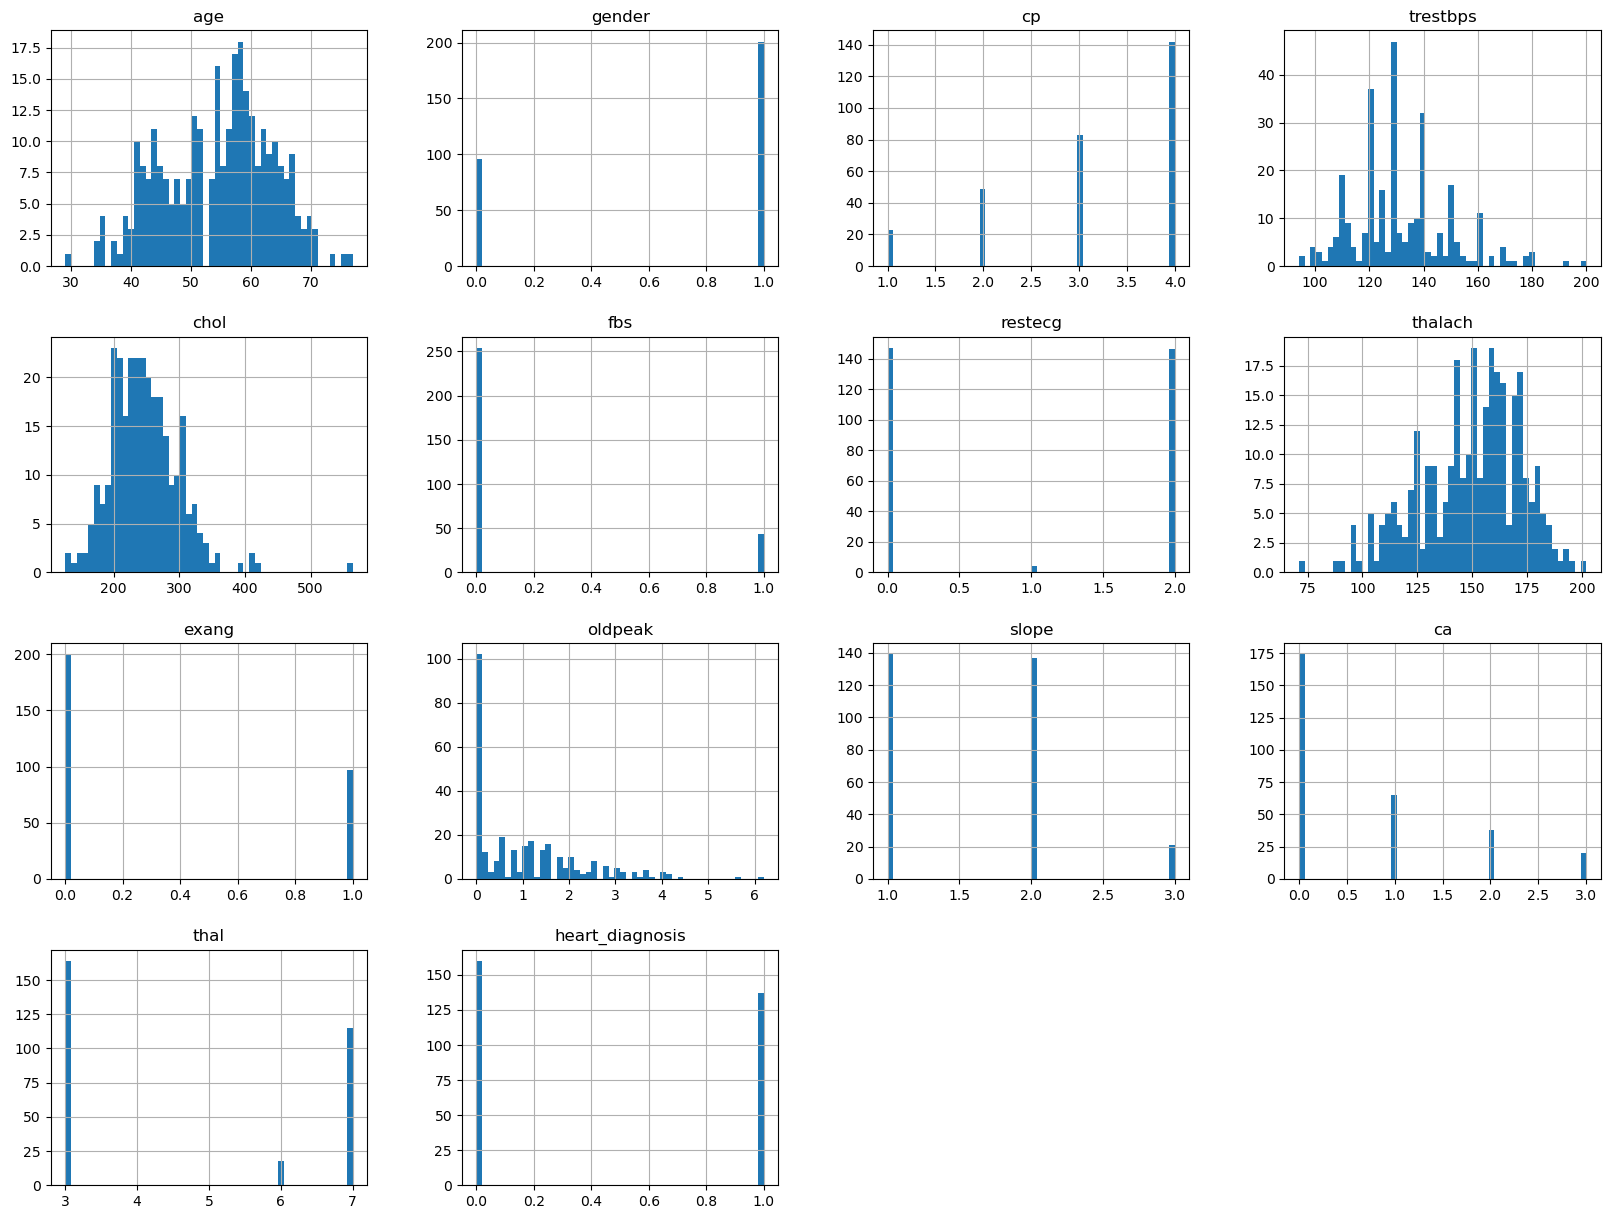

In [14]:
heart_data.hist(bins=50, figsize=(20,15))

<AxesSubplot:xlabel='heart_diagnosis', ylabel='count'>

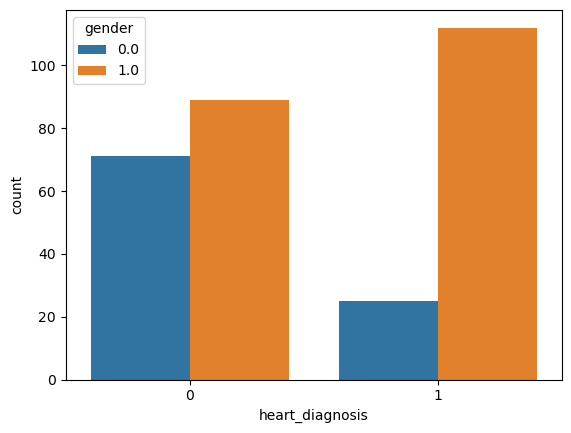

In [15]:
sns.countplot(x='heart_diagnosis',hue ='gender',data = heart_data)

In [16]:
# Statistical measure about the data 
heart_data.describe()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_diagnosis
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [17]:
# 1 --> heart_diagnosis
# 0 --> Healthy

#### splitting the feature and target 

In [18]:
# Split the data into features and target
reaming_data_x = heart_data.drop(columns ='heart_diagnosis',axis =1)
heart_diagnosis_value_y = heart_data['heart_diagnosis']

In [19]:
reaming_data_x

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0


In [20]:
heart_diagnosis_value_y

0      0
1      1
2      1
3      0
4      0
      ..
297    1
298    1
299    1
300    1
301    1
Name: heart_diagnosis, Length: 297, dtype: int64

#### Split the data into training and testing sets

In [21]:

X_train, X_test, y_train, y_test = train_test_split(reaming_data_x, heart_diagnosis_value_y, test_size=0.2, stratify=heart_diagnosis_value_y,random_state=2)

In [22]:
print(reaming_data_x.shape,X_train.shape,X_test.shape)

(297, 13) (237, 13) (60, 13)


### Model Training 

#### LogisticRegression

In [23]:
Model = LogisticRegression()

##### Train the machine learning model LogisticRegression with traning data we can use fit method

In [24]:
Model.fit(X_train,y_train)

LogisticRegression()

### Model Evalution

#### Accuracy Score

In [25]:
## accuracy on traning data
X_train_prediction = Model.predict(X_train)
traning_data_accuracy = accuracy_score(X_train_prediction,y_train)

In [26]:
print("Accuracy on traning data:" , traning_data_accuracy)

Accuracy on traning data: 0.8649789029535865


In [27]:
X_test_prediction = Model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,y_test)
print("Accuracy on Test data:" , test_data_accuracy)


Accuracy on Test data: 0.8333333333333334


### Building Predicting  System

In [28]:
input_data = (43,1,4,120,177,0,2,120,1,2.5,2,0,7)
# change input data into numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array as we are predicting for only on one data point 
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = Model.predict(input_data_reshaped)
print(prediction)



[1]
